In [70]:
library(treemapify)
library(reshape2)
library(viridis)
library(tidyverse)
library(rstatix)
library(treemap)
library(ggplot2)
library(inspectdf)
library(ggpubr)
library(tibble)
library(dplyr)
library(caret)
library(car)

In [63]:
Krause_database <- read_rds("../data/Krause_database.rds")

In [81]:
Krause_database |>
         select(where(is.character)) |>
         dplyr::summarise(across(everything(), ~ n_distinct(.))) |>
         tidyr::pivot_longer(cols = everything(), names_to = "variable", values_to = "n_unique") |>
         arrange(desc(n_unique))

variable,n_unique
<chr>,<int>
Additional.identification,1742
Longitude,1366
Corg.content,1001
Study.site,951
Notes,215
ï..Article.ID,150
Country,61
Seagrass.species,57
Seagrass.genus,14


In [86]:
lexicon <- data.frame("Level1" = c(rep("Flavour", 11), rep("Appearance", 4)),
                      "Level2" = c(rep("Misc", 6), rep("Pungent", 5), rep("Colour", 4)),
                      "Level3" = c("Fresh", "Refreshing", "Soapy", "Minty", "Nutty", "Milky", "Peppery", "Sharp", "Horseradish", "Mustard hot", "Spicy", "Colourful"," Fresh Green", "Dark Green", "Bright Green")
)

In [102]:
unique(Krause_database$Seagrass.bioregion)

[1] "Temperate Southern Oceans" "Tropical Atlantic"        
[3] "Temperate North Pacific"   "Tropical Indo-Pacific"    
[5] "Mediterranean"             "Temperate North Atlantic" 
[7] ""

In [116]:
(Krause_regions <- Krause_database |>
                   dplyr::mutate(across(where(is.character), ~ ifelse(. == "", "Unspecified", .))) |>
                   dplyr::group_by(Seagrass.bioregion) |>
                   dplyr::summarise(total_cores = n())                               
)

Seagrass.bioregion,total_cores
<chr>,<int>
Mediterranean,282
Temperate North Atlantic,437
Temperate North Pacific,92
Temperate Southern Oceans,518
Tropical Atlantic,352
Tropical Indo-Pacific,765
Unspecified,367


In [119]:
Krause_database |>
dplyr::filter(Seagrass.bioregion == "Temperate Southern Oceans") |>
dplyr::mutate(across(where(is.character), ~ ifelse(. == "", "Unspecified", .))) |>
dplyr::group_by(Country) |>
dplyr::summarise(total_cores = n())

Country,total_cores
<chr>,<int>
Australia,439
Brazil,34
Chile,3
New Zealand,3
South Africa,39


In [123]:
glimpse(Krause_database)

Rows: 2,813
Columns: 47
$ ï..Article.ID                          <chr> "CC_004", "CC_004", "CC_004", "…
$ Publication.year                       <int> 2021, 2021, 2021, 2021, 2021, 2…
$ Study.site                             <chr> "Parker Point", "Parakeet Bay",…
$ Country                                <chr> "Australia", "Australia", "Aust…
$ Latitude                               <dbl> -32.02285, -31.98907, -32.01306…
$ Longitude                              <chr> "115.5314111", "115.51912", "11…
$ Coastal.typology                       <chr> "Type I: Small deltas", "Type I…
$ Marine.ecoregion                       <chr> "Temperate Australasia", "Tempe…
$ Seagrass.bioregion                     <chr> "Temperate Southern Oceans", "T…
$ Seagrass.functionalmorphological.group <chr> "Group A: Ephemeral (Halophila,…
$ Seagrass.species                       <chr> "Halophila sp.", "Halophila sp.…
$ Seagrass.genus                         <chr> "Halophila sp.", "Halophila sp.…
$ Additional.ide

In [128]:
Krause_database |>
dplyr::filter(Country == "South Africa") |>
dplyr::select(1:3) |> count(ï..Article.ID, Study.site)

ï..Article.ID,Study.site,n
<chr>,<chr>,<int>
CC_006,,1
CC_006,Various South African estuaries,1
JF_171,Berg lower,1
JF_171,Berg upper,1
JF_171,Breede upper,1
JK_185,Berg,2
JK_185,Breede,2
JK_185,Knysna,2
JK_185,Mngazana,2


In [115]:
sum(Krause_regions$total_cores)

[1] 2813

In [111]:
glimpse(Krause_regions)

Rows: 2,813
Columns: 3
$ Seagrass.bioregion <chr> "Temperate Southern Oceans", "Temperate Southern Oc…
$ Marine.ecoregion   <chr> "Temperate Australasia", "Temperate Australasia", "…
$ Country            <chr> "Australia", "Australia", "Australia", "Australia",…


Saving 7 x 7 in image


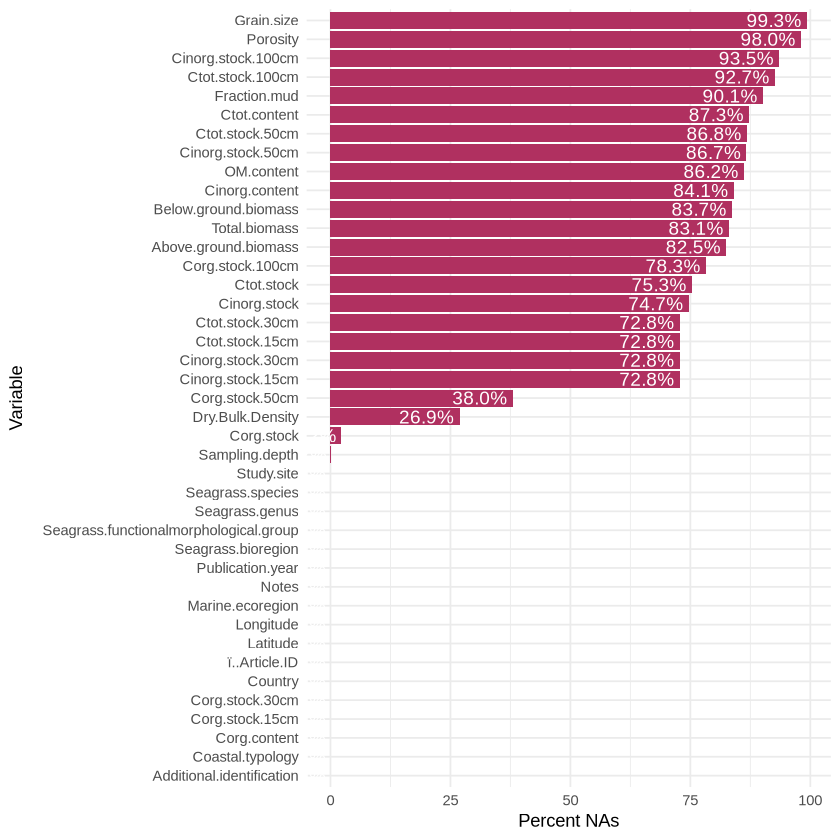

In [112]:
# Calculate % NA per column
na_percent <- data30cm %>%
  summarise(across(everything(), ~ mean(is.na(.)) * 100)) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Percent_NA")

# Plot with percent labels
ggplot(na_percent, aes(x = reorder(Column, Percent_NA), y = Percent_NA)) +
  geom_bar(stat = "identity", fill = "maroon") +
  geom_text(aes(label = sprintf("%.1f%%", Percent_NA)), 
            color = "white", 
            hjust = 1.1, 
            size = 4) +
  coord_flip() +
  labs(
    x = "Variable",
    y = "Percent NAs"
  ) +
  theme_minimal()

ggsave("../plots/Krause_missing.pdf")

Saving 7 x 7 in image


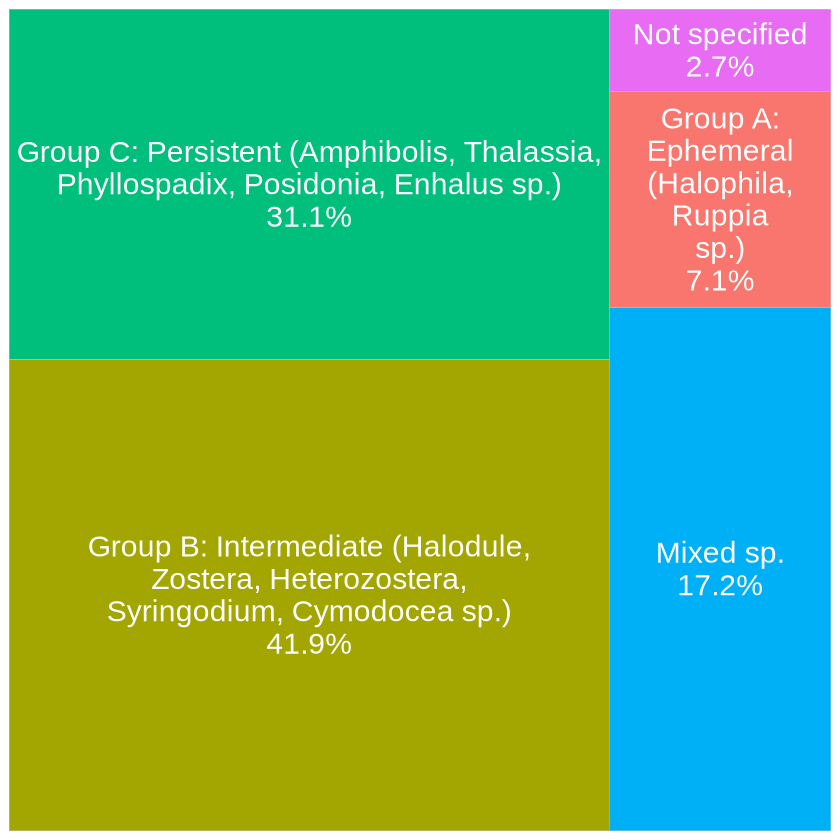

In [64]:
# Prepare data
cat_data <- Krause_database %>%
  count(Seagrass.functionalmorphological.group) %>%
  mutate(Percent = n / sum(n) * 100)

# Tree map
ggplot(cat_data, aes(
  area = Percent,
  fill = Seagrass.functionalmorphological.group,
  label = paste0(Seagrass.functionalmorphological.group, "\n", sprintf("%.1f%%", Percent))
)) +
  geom_treemap() +
  geom_treemap_text(
    color = "white",
    place = "centre",
    grow = FALSE,
    reflow = TRUE) +
  theme_minimal() + theme(legend.position = "none") 

ggsave("../plots/Krause_functional_morphology.pdf")